In [1]:
#Dataset
#Name: headlines.csv 
#Location: https://mitu.co.in/dataset

### Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load the dataset

In [3]:
df= pd.read_csv('headlines.csv', header=None)

In [4]:
df

,0
0,Budget to set scene for election\n \n Gordon B...
1,Army chiefs in regiments decision\n \n Militar...
2,Howard denies split over ID cards\n \n Michael...
3,Observers to monitor UK election\n \n Minister...
4,Kilroy names election seat target\n \n Ex-chat...
...,...
2220,India opens skies to competition\n \n India wi...
2221,Yukos bankruptcy 'not US matter'\n \n Russian ...
2222,Survey confirms property slowdown\n \n Governm...
2223,High fuel prices hit BA's profits\n \n British...


In [5]:
df.shape

(2225, 1)

In [6]:
print(df.iloc[1,:].values[0])

Army chiefs in regiments decision
 
 Military chiefs are expected to meet to make a final decision on the future of Scotland's Army regiments.
 
 A committee of the Army Board, which is made up of the most senior defence figures, will discuss plans for restructuring regiments on Monday. The proposals include cutting Scotland's six single-battalion regiments to five and merging these into a super regiment. The plans have faced stiff opposition from campaigners and politicians alike. The committee's decision must be ratified by Defence Secretary Geoff Hoon and Prime Minister Tony Blair. It is expected that it will be made public next week. When ministers announced a reorganisation of the Army it drew a question mark over the futures of the Black Watch, the Kings Own Scottish Borderers, the Royal Scots, the Royal Highland Fusiliers and the Argyll and Sutherland Highlanders. In October, the Council of Scottish Colonels proposed the merger of the Royal Scots and the King's Own Scottish Bord

###  Data preparation

In [7]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag

In [8]:
swords= stopwords.words('english')
wnl= WordNetLemmatizer()

In [9]:
def lemmatize(word):
    tag= pos_tag([word])
    pos= 'n'
    if tag[0][1].startswith('N'):
        pos='n'
    elif tag[0][1].startswith('V'):
        pos='v'
    elif tag[0][1].startswith('R'):
        pos='r'
    elif tag[0][1].startswith('J'):
        pos='a'
    return wnl.lemmatize(word, pos=pos)

In [10]:
lemmatize('programming')

'program'

In [11]:
# define analyzer function
def clean_txt(sent):
    tokens1= word_tokenize(sent)
    tokens2= [token for token in tokens1 if token.isalnum()]
    tokens3= [token.lower() for token in tokens2 if token.lower() not in swords]
    tokens4= [lemmatize(token) for token in tokens3]
    return tokens4

In [12]:
sent= 'Hello friends! How are you? I like Python Programming.'

In [13]:
clean_txt(sent)

['hello', 'friend', 'like', 'python', 'program']

### TF* IDF Vectorizer

In [14]:
#import the class
from sklearn.feature_extraction.text import TfidfVectorizer

In [15]:
#create the object
tf= TfidfVectorizer(analyzer=clean_txt)

In [16]:
%%time
x_new = tf.fit_transform(df[0])

CPU times: total: 3min 20s
Wall time: 3min 26s


In [17]:
x_new

<2225x22483 sparse matrix of type '<class 'numpy.float64'>'
	with 319728 stored elements in Compressed Sparse Row format>

### Create the clusters

In [18]:
from sklearn.cluster import KMeans

In [19]:
km = KMeans(random_state=0)

In [20]:
km.fit_predict(x_new)

array([4, 6, 4, ..., 2, 5, 2])

In [22]:
set(km.labels_)

{0, 1, 2, 3, 4, 5, 6, 7}

In [25]:
# sum of squared error of all clusters
km.inertia_

2067.4969194117366

### Elbow Method

In [26]:
# to choose the value of k
sse=[]
for k in range(1,16):
    km= KMeans(n_clusters=k, random_state=0, n_init='auto')
    km.fit_predict(x_new)
    sse.append(km.inertia_)

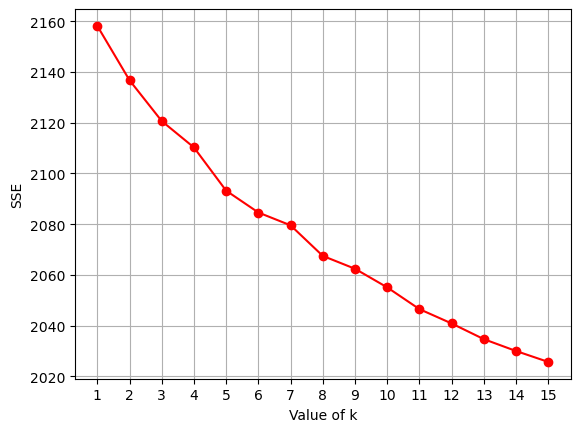

In [28]:
plt.xlabel('Value of k')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16), sse, marker='o', color='r')

### Create the clusters

In [29]:
 km= KMeans(n_clusters=5, random_state=0, n_init='auto')

In [30]:
labels=km.fit_predict(x_new)

In [31]:
labels

array([4, 3, 4, ..., 3, 3, 3])

### Separate the clusters

In [33]:
zero= df[labels==0]
one= df[labels==1]
two= df[labels==2]
three= df[labels==3]
four= df[labels==4]

In [34]:
print('Cluster-0:',len(zero))
print('Cluster-1:',len(one))
print('Cluster-2:',len(two))
print('Cluster-3:',len(three))
print('Cluster-4:',len(four))

Cluster-0: 376
Cluster-1: 331
Cluster-2: 521
Cluster-3: 716
Cluster-4: 281


### Wordcloud

In [35]:
from wordcloud import WordCloud

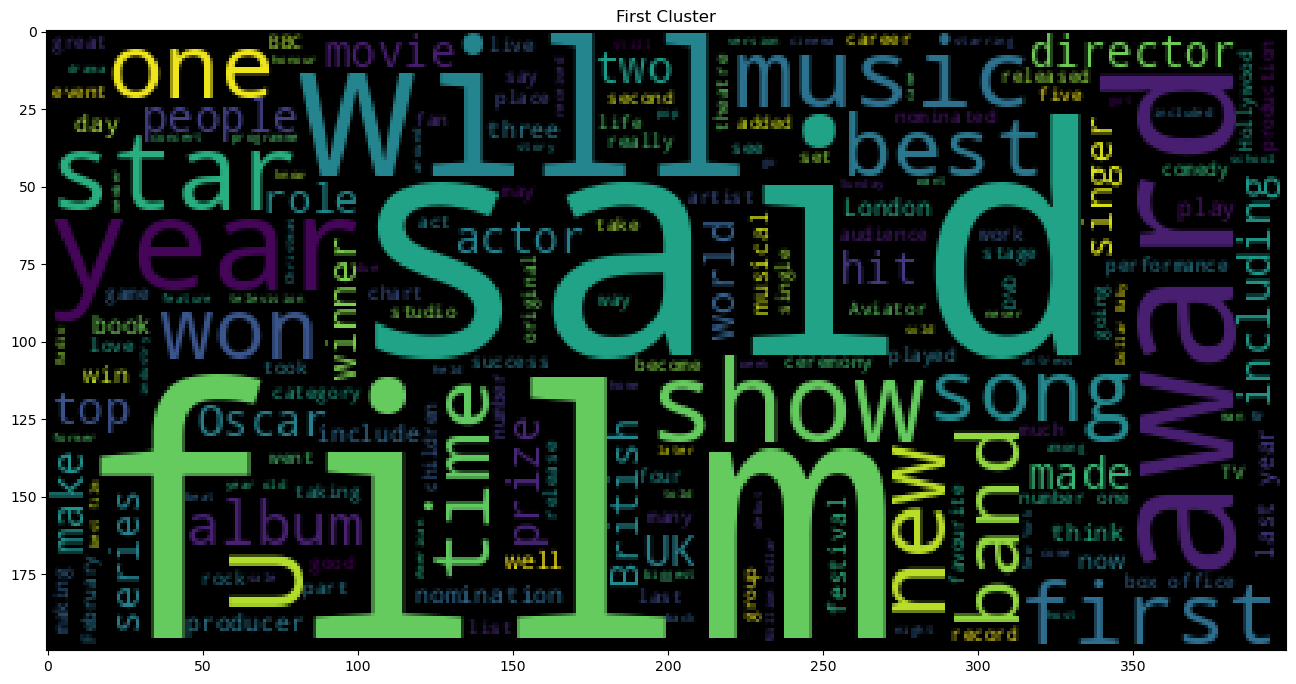

In [38]:
wc= WordCloud().generate(' '.join(one[0]))
plt.figure(figsize=(16,9))
plt.title('First Cluster')
plt.imshow(wc)

In [39]:
swords= stopwords.words('english')

In [41]:
from nltk import FreqDist
new= ' '.join(one[0])
clean= [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq= FreqDist(clean)
freq.most_common(10)

[('film', 669),
 ('said', 621),
 ('best', 575),
 ('also', 337),
 ('year', 319),
 ('music', 289),
 ('show', 261),
 ('one', 250),
 ('US', 246),
 ('first', 212)]

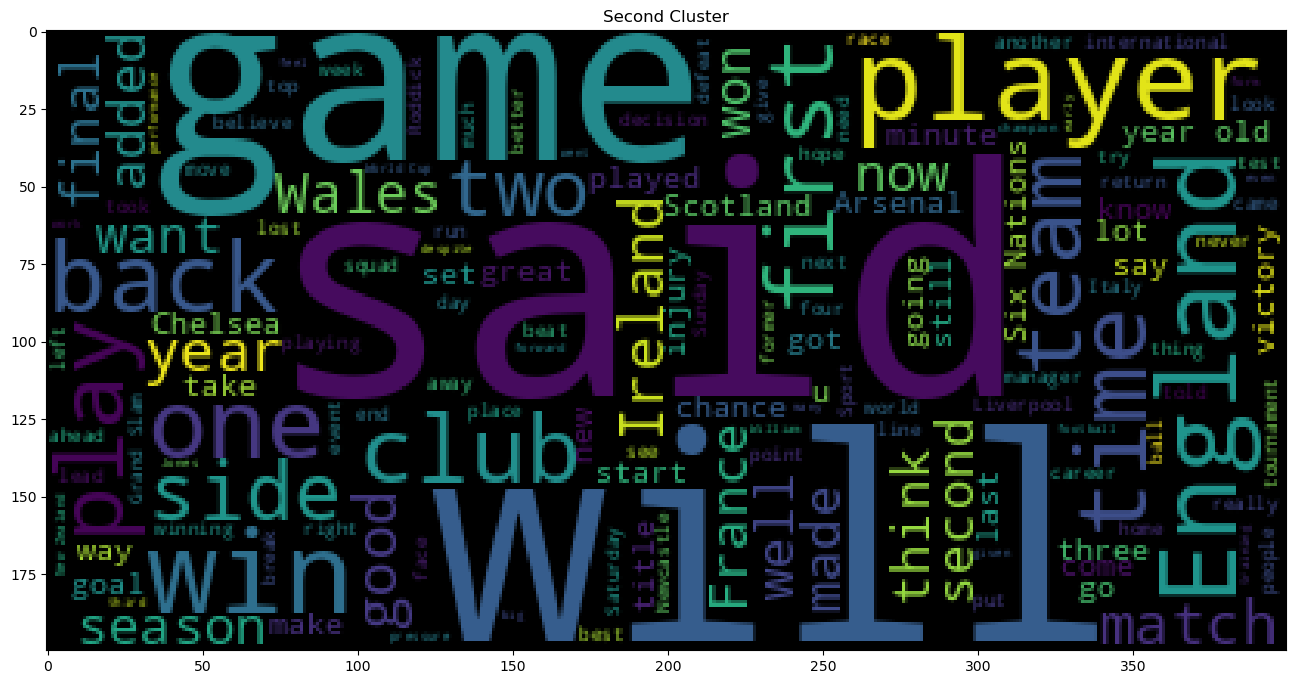

In [42]:
wc= WordCloud().generate(' '.join(two[0]))
plt.figure(figsize=(16,9))
plt.title('Second Cluster')
plt.imshow(wc)

In [43]:
new= ' '.join(two[0])
clean= [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq= FreqDist(clean)
freq.most_common(10)

[('said', 963),
 ('game', 520),
 ('England', 465),
 ('first', 440),
 ('would', 422),
 ('win', 412),
 ('last', 370),
 ('one', 344),
 ('also', 343),
 ('two', 342)]

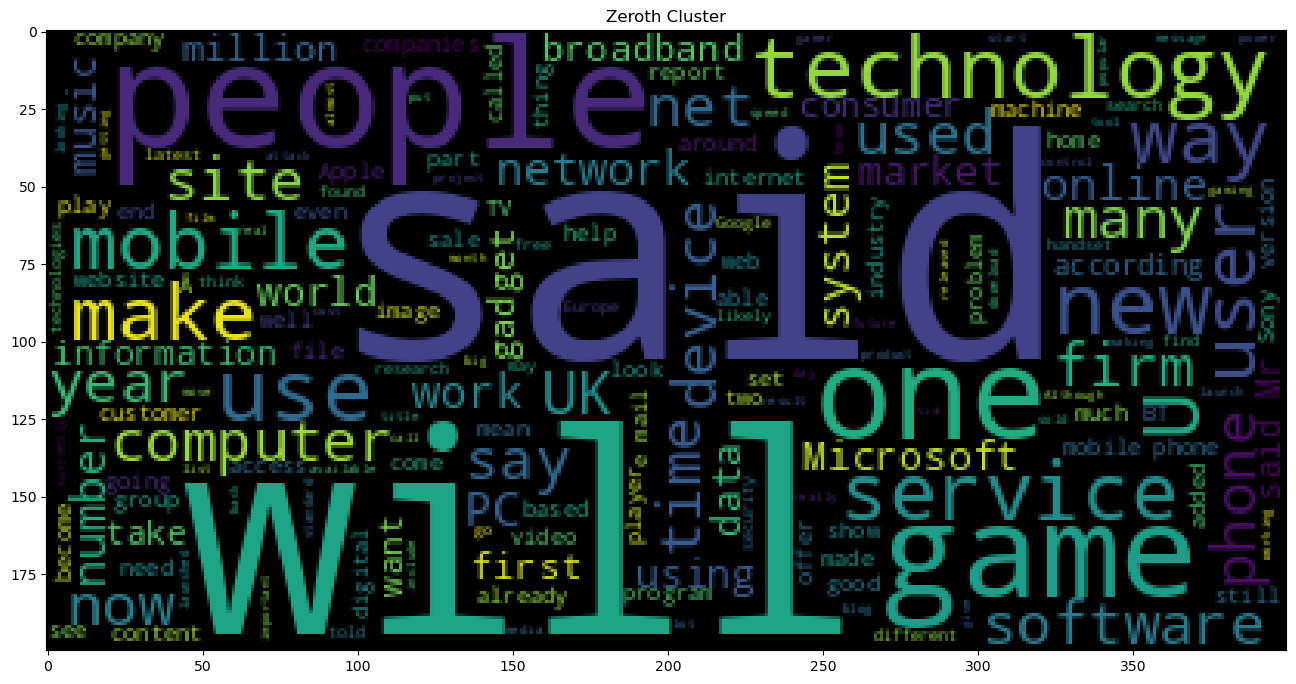

In [52]:
wc= WordCloud().generate(' '.join(zero[0]))
plt.figure(figsize=(16,9))
plt.title('Zeroth Cluster')
plt.imshow(wc)

In [53]:
new= ' '.join(zero[0])
clean= [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq= FreqDist(clean)
freq.most_common(10)

[('said', 1518),
 ('people', 885),
 ('also', 490),
 ('Mr', 475),
 ('technology', 468),
 ('new', 448),
 ('would', 444),
 ('could', 432),
 ('mobile', 423),
 ('music', 417)]

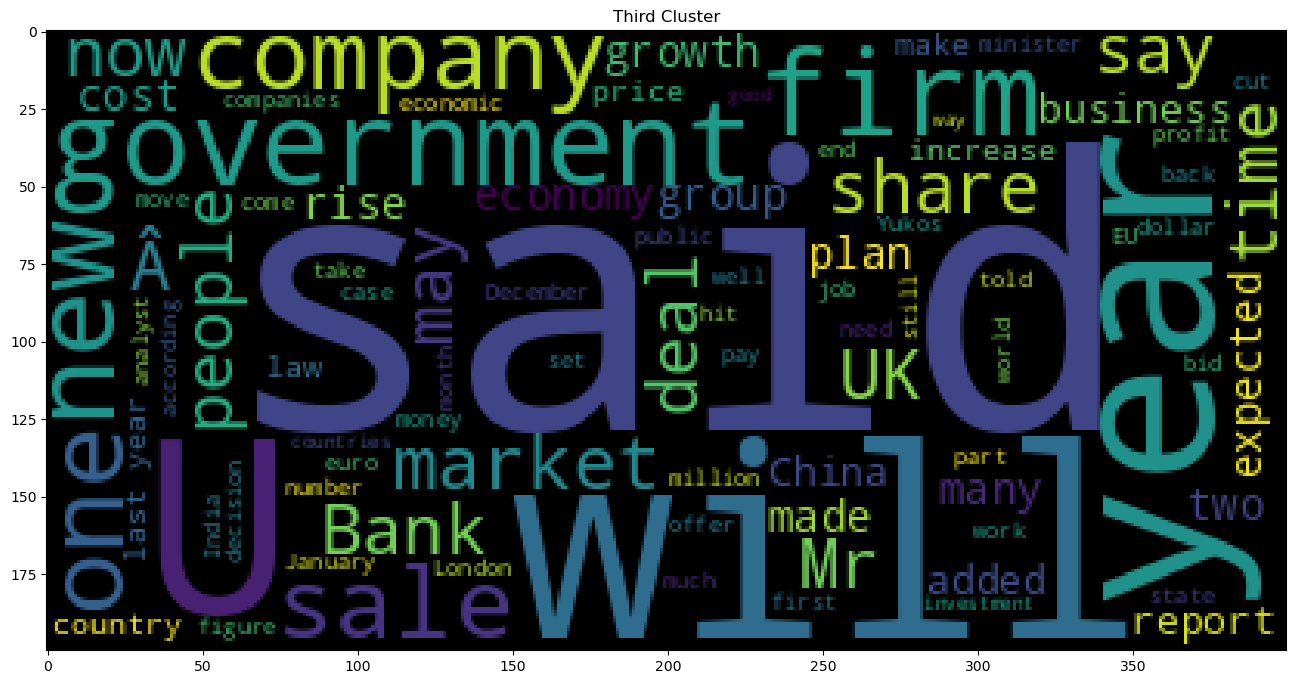

In [54]:
wc= WordCloud().generate(' '.join(three[0]))
plt.figure(figsize=(16,9))
plt.title('Third Cluster')
plt.imshow(wc)

In [55]:
new= ' '.join(three[0])
clean= [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq= FreqDist(clean)
freq.most_common(10)

[('said', 2614),
 ('US', 932),
 ('Mr', 867),
 ('would', 775),
 ('year', 761),
 ('also', 603),
 ('government', 530),
 ('could', 463),
 ('company', 457),
 ('new', 451)]

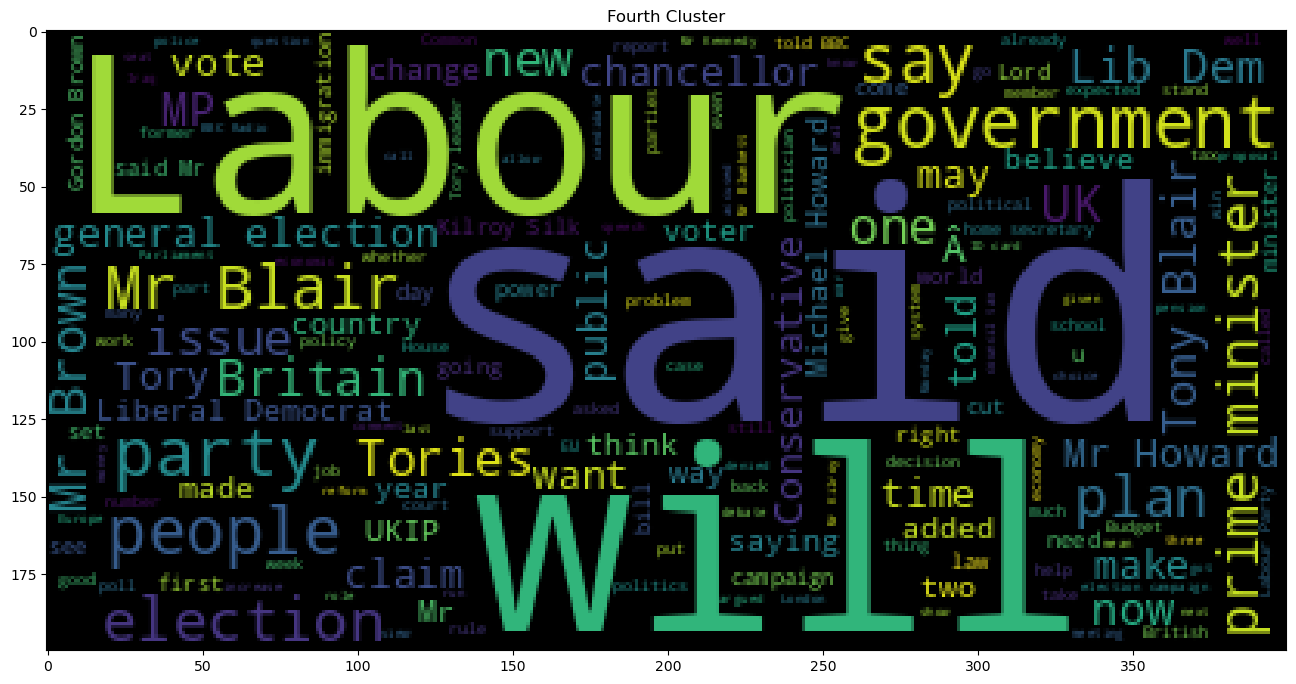

In [56]:
wc= WordCloud().generate(' '.join(four[0]))
plt.figure(figsize=(16,9))
plt.title('Fourth Cluster')
plt.imshow(wc)

In [57]:
new= ' '.join(four[0])
clean= [x for x in word_tokenize(new) if x.lower() not in swords and x.isalpha()]
freq= FreqDist(clean)
freq.most_common(10)

[('said', 1528),
 ('Mr', 1485),
 ('would', 814),
 ('Labour', 727),
 ('election', 547),
 ('Blair', 540),
 ('government', 501),
 ('people', 431),
 ('party', 411),
 ('Brown', 375)]